In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('chennai_reservoir_levels.csv')
df

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0
...,...,...,...,...,...
5642,13-06-2019,30.0,0.0,0.0,1.0
5643,14-06-2019,28.0,0.0,0.0,1.0
5644,15-06-2019,27.0,0.0,0.0,1.0
5645,16-06-2019,26.0,0.0,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             5647 non-null   object 
 1   POONDI           5647 non-null   float64
 2   CHOLAVARAM       5647 non-null   float64
 3   REDHILLS         5647 non-null   float64
 4   CHEMBARAMBAKKAM  5647 non-null   float64
dtypes: float64(4), object(1)
memory usage: 220.7+ KB


In [5]:
df['Date'][0]

'01-01-2004'

In [6]:
type(df['Date'][0])

str

In [7]:
import datetime

In [10]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 220.7 KB


In [17]:
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
 5   Year             5647 non-null   int64         
 6   Month            5647 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 308.9 KB


In [19]:
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month
0,2004-01-01,3.9,0.0,268.0,0.0,2004,1
1,2004-01-02,3.9,0.0,268.0,0.0,2004,1
2,2004-01-03,3.9,0.0,267.0,0.0,2004,1
3,2004-01-04,3.9,0.0,267.0,0.0,2004,1
4,2004-01-05,3.8,0.0,267.0,0.0,2004,1


In [20]:
df.sample(5)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month
4139,2015-05-02,153.0,17.0,1347.0,799.0,2015,5
4571,2016-07-07,1007.0,79.0,1118.0,1901.0,2016,7
410,2005-02-14,771.0,50.0,1664.0,244.0,2005,2
3885,2014-08-21,511.0,0.0,759.0,699.0,2014,8
848,2006-04-28,1772.0,527.0,2177.0,2195.0,2006,4


In [21]:
df.columns

Index(['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM', 'Year',
       'Month'],
      dtype='object')

In [23]:
df['Total'] = df[['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']].sum(axis=1)
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month,Total
0,2004-01-01,3.9,0.0,268.0,0.0,2004,1,271.9
1,2004-01-02,3.9,0.0,268.0,0.0,2004,1,271.9
2,2004-01-03,3.9,0.0,267.0,0.0,2004,1,270.9
3,2004-01-04,3.9,0.0,267.0,0.0,2004,1,270.9
4,2004-01-05,3.8,0.0,267.0,0.0,2004,1,270.8


In [27]:
Yearwise = df.groupby('Year',as_index=False).mean()
Yearwise = Yearwise[['Year','POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM','Total']]
Yearwise

,Year,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total
0,2004,77.766967,19.060109,220.899180,68.683060,386.409317
1,2005,722.680603,147.771781,1468.480712,581.345205,2920.278301
2,2006,1827.553425,484.947945,2044.356164,2075.317808,6432.175342
3,2007,1794.912329,286.391781,2356.654795,1715.126027,6153.084932
4,2008,1862.338798,545.609290,2445.161202,2196.967213,7050.076503
5,2009,1846.221918,414.882110,1969.731205,1795.677123,6026.512356
6,2010,1651.523288,382.175342,2045.271233,2020.501370,6099.471233
7,2011,2399.068493,499.509589,2573.326027,2492.282192,7964.186301
8,2012,1742.816940,225.934426,1872.218579,1571.677596,5412.647541
9,2013,536.953425,100.049315,1324.109589,988.964384,2950.076712


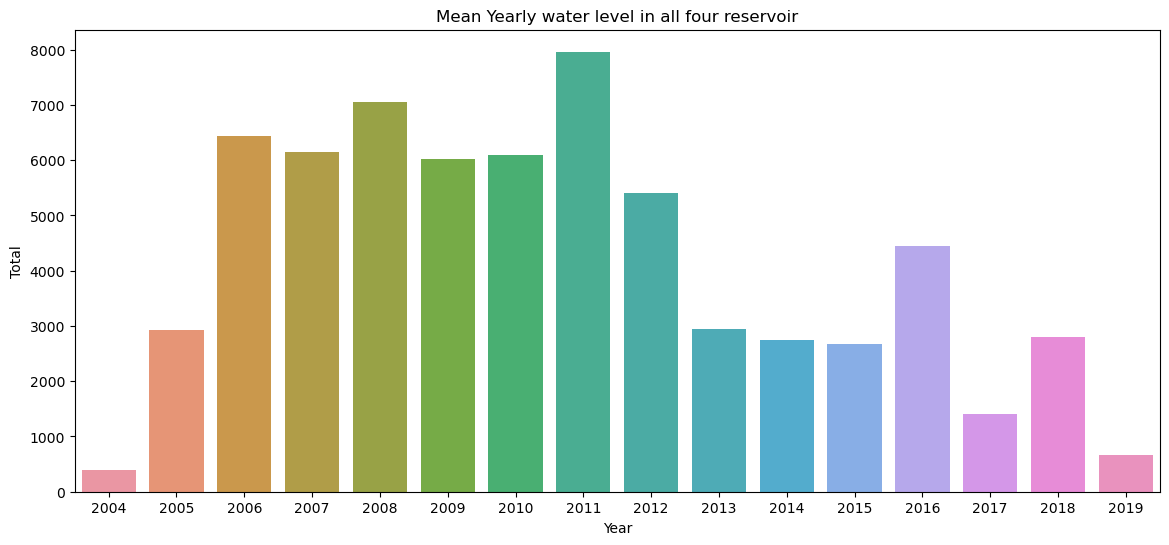

In [29]:
plt.figure(figsize=(14,6))
sns.barplot(data=Yearwise,x='Year',y='Total')
plt.title('Mean Yearly water level in all four reservoir')
plt.show()

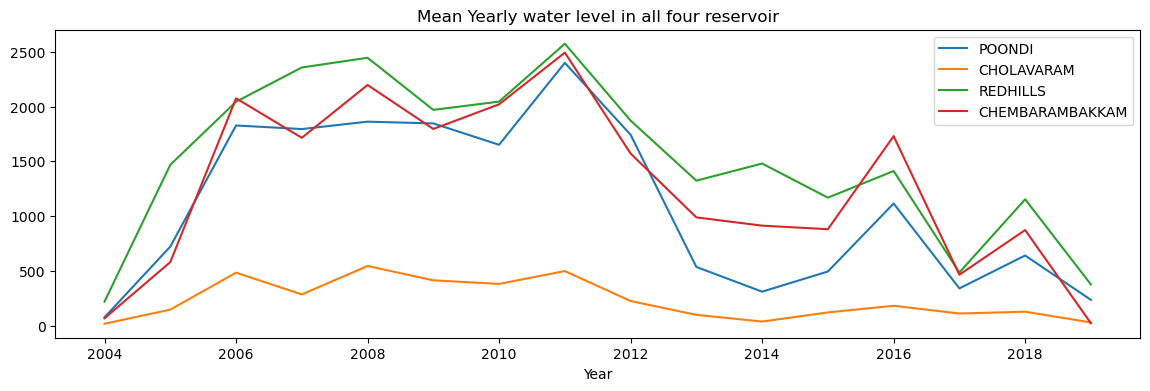

In [33]:
Yearwise.plot(x='Year',y=['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM'],figsize=(14,4))
plt.title('Mean Yearly water level in all four reservoir')
plt.show()

<Axes: xlabel='Year', ylabel='POONDI'>

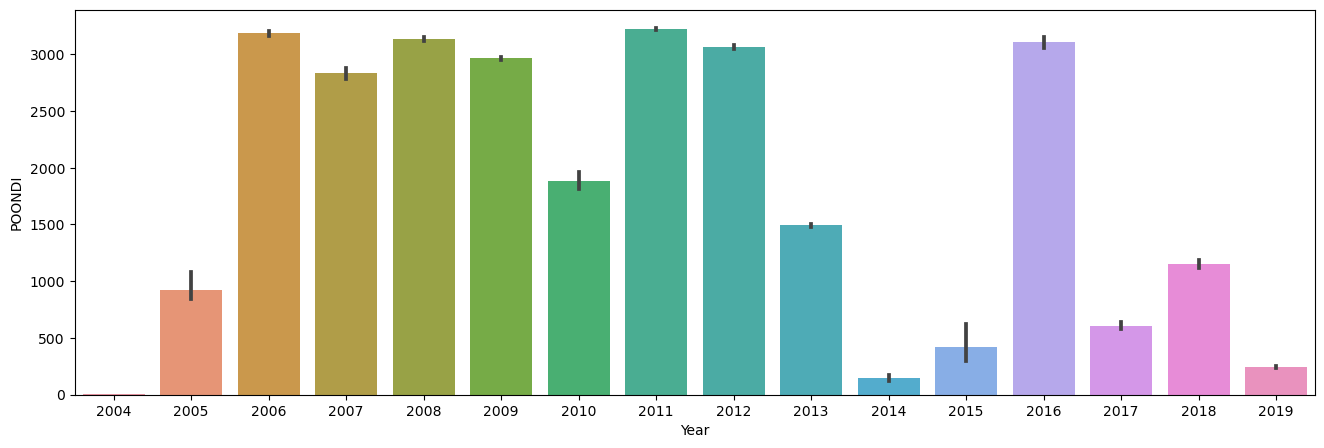

In [39]:
demo_month = df[df['Month']==1]
plt.figure(figsize=(16,5))
sns.barplot(x='Year',y='POONDI',data=demo_month)

In [40]:
Monthwise = df.groupby('Month',as_index=False).mean()
Monthwise = Yearwise[['Year','POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM','Total']]
Monthwise

,Year,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total
0,2004,77.766967,19.060109,220.899180,68.683060,386.409317
1,2005,722.680603,147.771781,1468.480712,581.345205,2920.278301
2,2006,1827.553425,484.947945,2044.356164,2075.317808,6432.175342
3,2007,1794.912329,286.391781,2356.654795,1715.126027,6153.084932
4,2008,1862.338798,545.609290,2445.161202,2196.967213,7050.076503
5,2009,1846.221918,414.882110,1969.731205,1795.677123,6026.512356
6,2010,1651.523288,382.175342,2045.271233,2020.501370,6099.471233
7,2011,2399.068493,499.509589,2573.326027,2492.282192,7964.186301
8,2012,1742.816940,225.934426,1872.218579,1571.677596,5412.647541
9,2013,536.953425,100.049315,1324.109589,988.964384,2950.076712


###### Inferences : 

1. Although chennai receive some rainfall from SW monsoon but majority of rainfall happens due to NE monsoon
2. Fromm 2006 to 2012, NE monsoon was very active but in recent years after 2012, we are witnessing a decline in rainfall from NE monsoon
3. Declining NE monsoon in recent year is in line with declining water level in 4 reservoir in corresponding period and also aligns with recent development in IT sector that took place esp in south chennai region at the cost of natural wetlands which were touted to be the reason of rainfall, ground water level and also reservoir water level